In [224]:
import pandas as pd
from sklearn.datasets import load_digits

In [225]:
digits=load_digits()

In [226]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [227]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

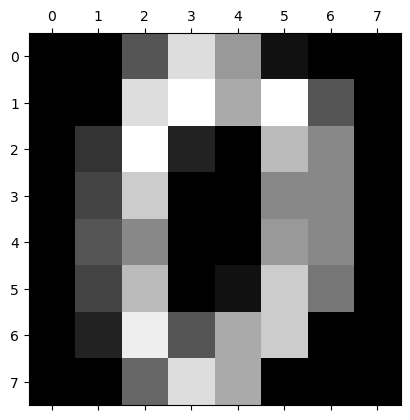

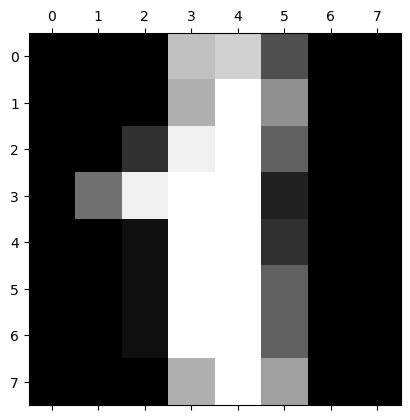

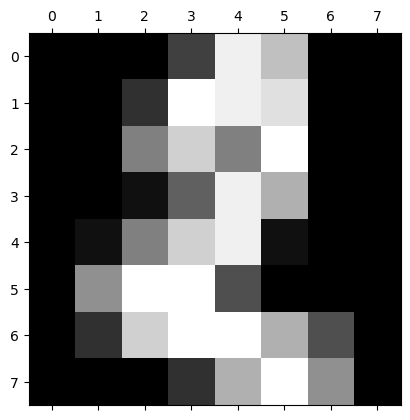

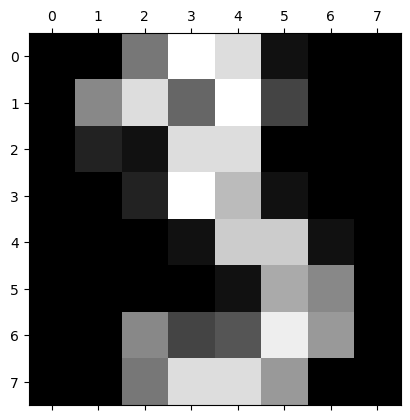

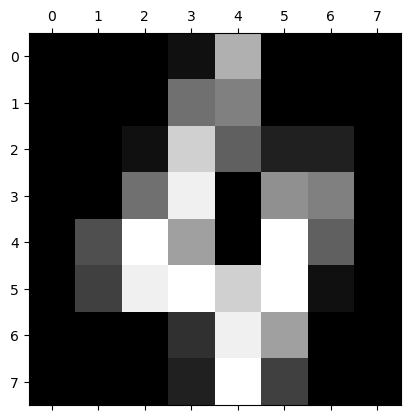

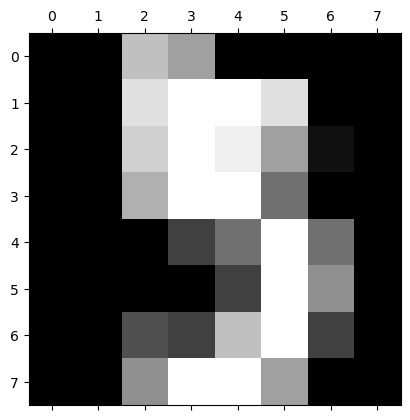

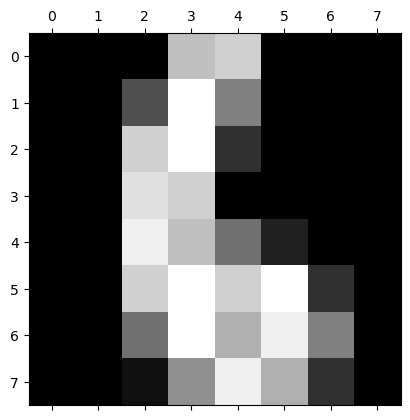

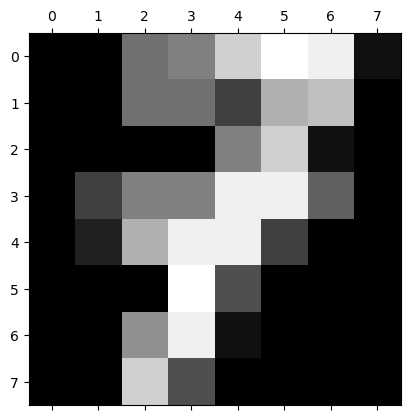

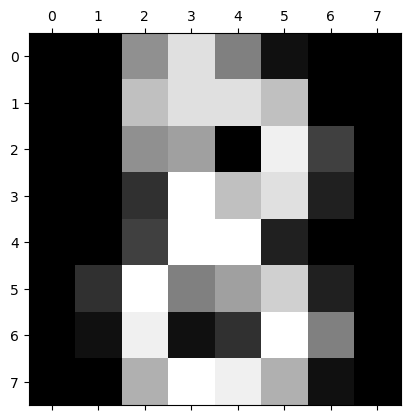

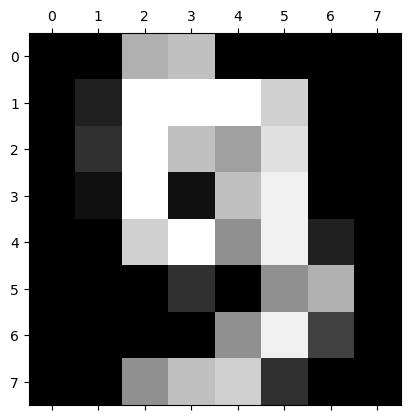

In [228]:
for i in range(10):
    plt.gray()
    plt.matshow(digits.images[i])

In [229]:
df=pd.DataFrame(digits.data)
df['target']=digits.target

In [230]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [231]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3, random_state=10)

In [233]:
knn=KNeighborsClassifier(n_neighbors=10)

In [234]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [251]:
X_test = np.asarray(X_test)
X_test

array([[ 0.,  0.,  8., ...,  0.,  0.,  0.],
       [ 0.,  1., 13., ..., 16., 16.,  0.],
       [ 0.,  1., 13., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0.,  7., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  8.,  0.,  0.],
       [ 0.,  0.,  9., ...,  0.,  0.,  0.]])

In [236]:
knn.score(X_test,y_test)

0.9814814814814815

In [237]:
y_test

763     5
278     2
1535    5
1777    4
123     8
       ..
1014    2
879     3
1674    7
114     8
822     5
Name: target, Length: 540, dtype: int32

In [238]:
from sklearn.model_selection import cross_val_score

In [239]:
np.mean(cross_val_score(KNeighborsClassifier(),digits.data,digits.target,cv=5))*100

96.27282575054161

In [240]:
# using grid search cv

In [241]:
from sklearn.model_selection import GridSearchCV

In [242]:
k_range=list(range(1,30))

In [243]:
param_grid=dict(n_neighbors=k_range)

In [244]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(digits.data,digits.target)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy')

In [245]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.97496276 0.9744072  0.97663253 0.97218187 0.97162942 0.96828988
 0.96773433 0.96494413 0.96494413 0.96216325 0.96382682 0.96438858
 0.96327126 0.96326816 0.96215705 0.96216015 0.96159839 0.9627157
 0.96215705 0.95882371 0.95937616 0.95882371 0.95882371 0.95714773
 0.95492241 0.95492551 0.95437306 0.95437616 0.95103973]


In [246]:
grid.best_score_*100

97.66325263811298

In [247]:
grid.best_params_

{'n_neighbors': 3}

In [248]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 46,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  2,  0, 51]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

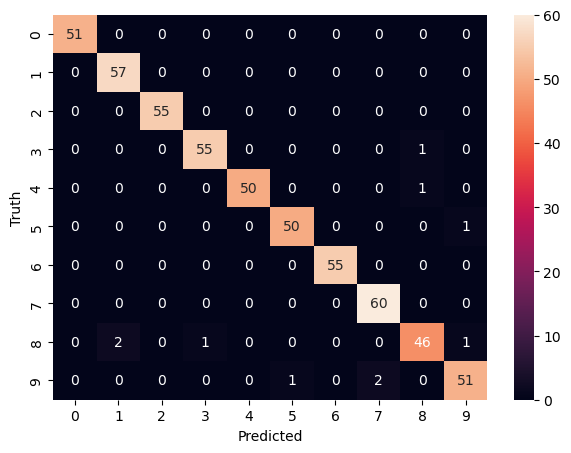

In [249]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [250]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.97      1.00      0.98        57
           2       1.00      1.00      1.00        55
           3       0.98      0.98      0.98        56
           4       1.00      0.98      0.99        51
           5       0.98      0.98      0.98        51
           6       1.00      1.00      1.00        55
           7       0.97      1.00      0.98        60
           8       0.96      0.92      0.94        50
           9       0.96      0.94      0.95        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

